In [1]:
# Set display to the full length

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!pip install --upgrade seaborn biopython pandasql
!pip install tabulate

Requirement already up-to-date: seaborn in /home/anton/anaconda3/lib/python3.7/site-packages (0.10.1)
Requirement already up-to-date: biopython in /home/anton/anaconda3/lib/python3.7/site-packages (1.76)
Requirement already up-to-date: pandasql in /home/anton/anaconda3/lib/python3.7/site-packages (0.7.3)


In [3]:
import pandas as pd
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

This notebook imports two datasets from Galaxy history:

 - a table of variants 
 - a GenBank file for NC_045512

In [4]:
# Import two datasets
# The number inside `get()` function corresponds to history ID

var_file = 17     # Number of history item with variant list
gb_file = 4      # Number of histoiry item containing genbank annoration for NC_045512

try:
    # In Galaxy
    var_path = get(var_file)
    gb_path = get(gb_file)
    IN_GALAXY = True
except NameError:
    # Local notebook execution
    var_path = 'variant_list.tsv.gz'
    gb_path = 'NC_045512.2.genbank'
    IN_GALAXY = False

In [5]:
# Clean artifacts of SNPeff from file headers

if var_path.endswith('gz'):
    !gunzip -c {var_path} | sed s/EFF\\\[\\\*\\\]\.//g > var.tab
else:
    !cat {var_path} | sed s/EFF\\\[\\\*\\\]\.//g > var.tab

In [6]:
# Create dataframe with variants and only keep variants with allele frequency above 5%
var  = pd.read_csv('var.tab', sep='\t')

In [7]:
var.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON
0,ERR4082738,NC_045512,479,A,G,44.0,54,0.037037,0,"26,26,1,1",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Aaa/Gaa
1,ERR4082738,NC_045512,501,C,T,41.0,54,0.037037,0,"26,26,1,1",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gCa/gTa
2,ERR4082738,NC_045512,2036,G,T,41.0,84,0.023810,0,"40,40,1,1",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Gct/Tct
3,ERR4082738,NC_045512,2112,T,C,41.0,84,0.023810,0,"41,41,1,1",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,aTc/aCc
4,ERR4082738,NC_045512,2118,G,A,40.0,82,0.024390,0,"39,41,1,1",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,gGc/gAc


In [8]:
# Extract metadata from SRA accessions and stick into a dataframe
cmd = 'pysradb metadata {} --saveto all.txt'.format(' '.join(var['Sample'].unique()))
!{cmd}
md = pd.read_csv('all.txt',sep="\t")
!rm all.txt

/home/anton/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/anton/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [9]:
md.head()

,study_accession,experiment_accession,experiment_title,experiment_desc,organism_taxid,organism_name,library_strategy,library_source,library_selection,sample_accession,sample_title,instrument,total_spots,total_size,run_accession,run_total_spots,run_total_bases
0,SRP253926,SRX8237253,PCR Tiled Amplification of SARS-CoV-2,PCR Tiled Amplification of SARS-CoV-2,2697049,Severe acute respiratory syndrome coronavirus 2,AMPLICON,VIRAL RNA,PCR,SRS6588365,NaN,Illumina MiSeq,841810,128866542,SRR11676272,841810,242698163
1,SRP253926,SRX8237252,PCR Tiled Amplification of SARS-CoV-2,PCR Tiled Amplification of SARS-CoV-2,2697049,Severe acute respiratory syndrome coronavirus 2,AMPLICON,VIRAL RNA,PCR,SRS6588364,NaN,Illumina MiSeq,278347,43970456,SRR11676273,278347,81852858
2,SRP253926,SRX8237251,PCR Tiled Amplification of SARS-CoV-2,PCR Tiled Amplification of SARS-CoV-2,2697049,Severe acute respiratory syndrome coronavirus 2,AMPLICON,VIRAL RNA,PCR,SRS6588363,NaN,Illumina MiSeq,422463,64284626,SRR11676274,422463,124109380
3,SRP253926,SRX8237250,PCR Tiled Amplification of SARS-CoV-2,PCR Tiled Amplification of SARS-CoV-2,2697049,Severe acute respiratory syndrome coronavirus 2,AMPLICON,VIRAL RNA,PCR,SRS6588362,NaN,Illumina MiSeq,507748,75972861,SRR11676275,507748,148048244
4,SRP253926,SRX8237249,PCR Tiled Amplification of SARS-CoV-2,PCR Tiled Amplification of SARS-CoV-2,2697049,Severe acute respiratory syndrome coronavirus 2,AMPLICON,VIRAL RNA,PCR,SRS6588361,NaN,Illumina MiSeq,251896,39278114,SRR11676276,251896,74060617


In [10]:
var.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710631 entries, 0 to 710630
Columns: 15 entries, Sample to CODON
dtypes: float64(2), int64(3), object(10)
memory usage: 81.3+ MB


In [11]:
# Keep only variants with allele frequency above 5%
var = var[var['AF']>= 0.05]

In [12]:
var.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70251 entries, 11 to 710626
Columns: 15 entries, Sample to CODON
dtypes: float64(2), int64(3), object(10)
memory usage: 8.6+ MB


In [13]:
# Add metadata into to variant table
var = pysqldf('select var.*, study_accession,library_strategy,library_source,library_selection from var left join md on Sample = run_accession')

In [14]:
# Add fiels describing variant type and set it to "I" (indels) for those rows that reference or alternative are gaps (-)
# or are of unequal length
var.loc[ ( var['REF'] == '-' ) | ( var['ALT'] == '-' ) ,'type'] = 'I'
var.loc[ ( var['ALT'].str.len() != var['REF'].str.len() ), 'type' ] = 'I'

In [15]:
# Set type field for SNPs
var.loc[ ( var['REF'].str.len() == 1 ) & ( var['ALT'].str.len() == 1 ) & (var['type'].isnull()), 'type'] = 'S'

In [16]:
# Set type field for MNPs 
var.loc[ ( ( var['REF'].str.len() > 1 ) & ( var['ALT'].str.len() == var['REF'].str.len() ) ) , 'type'  ] = 'M'

In [17]:
# How many of each type do we have?
for item in ['S','M','I']:
    print(item)
    print(var[var['type']==item].info(verbose=False))

S
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70251 entries, 0 to 70250
Columns: 20 entries, Sample to type
dtypes: float64(2), int64(3), object(15)
memory usage: 11.3+ MB
None
M
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 20 entries, Sample to type
dtypes: float64(2), int64(3), object(15)
memory usage: 0.0+ bytes
None
I
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 20 entries, Sample to type
dtypes: float64(2), int64(3), object(15)
memory usage: 0.0+ bytes
None


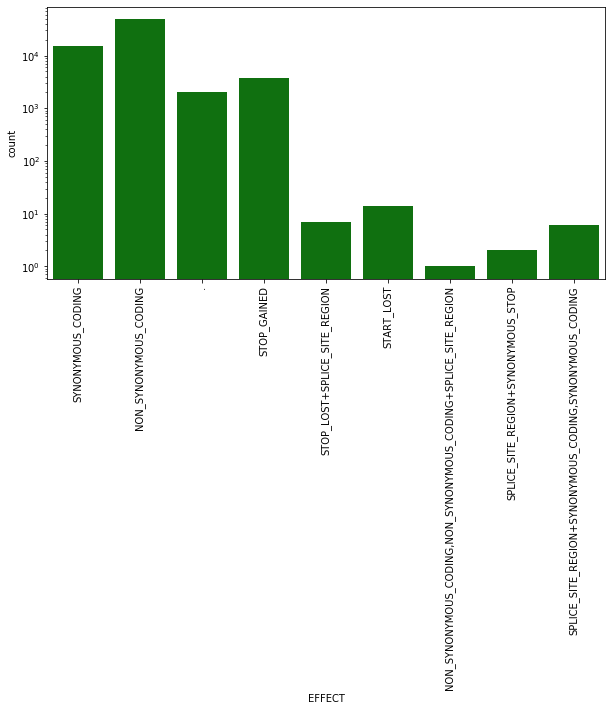

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x='EFFECT',data=var, color='g')
plt.xticks(rotation=90)
plt.yscale('log')

In [50]:
pysqldf('select study_accession, library_strategy,count(distinct Sample) as samples from var group by study_accession order by samples desc')

,study_accession,library_strategy,samples
0,SRP253798,AMPLICON,876
1,ERP121228,AMPLICON,227
2,SRP253926,AMPLICON,118
3,SRP256957,AMPLICON,54
4,SRP255151,AMPLICON,15
5,SRP258006,AMPLICON,10
6,SRP248092,RNA-Seq,7
7,SRP254688,RNA-Seq,6
8,SRP251618,RNA-Seq,5
9,SRP257865,WGS,4


In [51]:
a = pysqldf('select Sample, study_accession, library_strategy, count(*) as variants from var where AF >= 0.05 group by Sample')

In [52]:
b = pysqldf('select Sample, count(*) as stops from var where AF >= 0.05 and EFFECT = "STOP_GAINED" group by Sample')

In [54]:
var_vs_stops = pysqldf('select a.*, b.stops from a left join b on a.Sample = b.Sample')

In [55]:
var_vs_stops.fillna(0, inplace=True)

In [56]:
var_vs_stops['ratio'] = var_vs_stops['stops']/var_vs_stops['variants']

In [57]:
var_vs_stops

,Sample,study_accession,library_strategy,variants,stops,ratio
0,ERR4082740,ERP121228,AMPLICON,2,0.0,0.000000
1,ERR4082742,ERP121228,AMPLICON,4,0.0,0.000000
2,ERR4082743,ERP121228,AMPLICON,5,1.0,0.200000
3,ERR4082745,ERP121228,AMPLICON,1,0.0,0.000000
4,ERR4082747,ERP121228,AMPLICON,2,0.0,0.000000
...,...,...,...,...,...,...
1338,SRR11676324,SRP253926,AMPLICON,5,0.0,0.000000
1339,SRR11676325,SRP253926,AMPLICON,5,0.0,0.000000
1340,SRR11676326,SRP253926,AMPLICON,20,1.0,0.050000
1341,SRR11676327,SRP253926,AMPLICON,11,1.0,0.090909


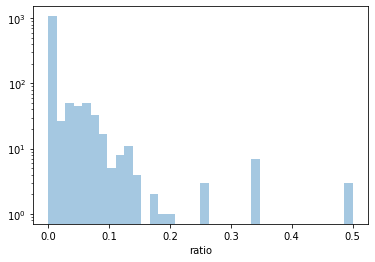

In [58]:
#Diustribution of ratio
sns.distplot(var_vs_stops['ratio'],kde=False)
plt.yscale('log')

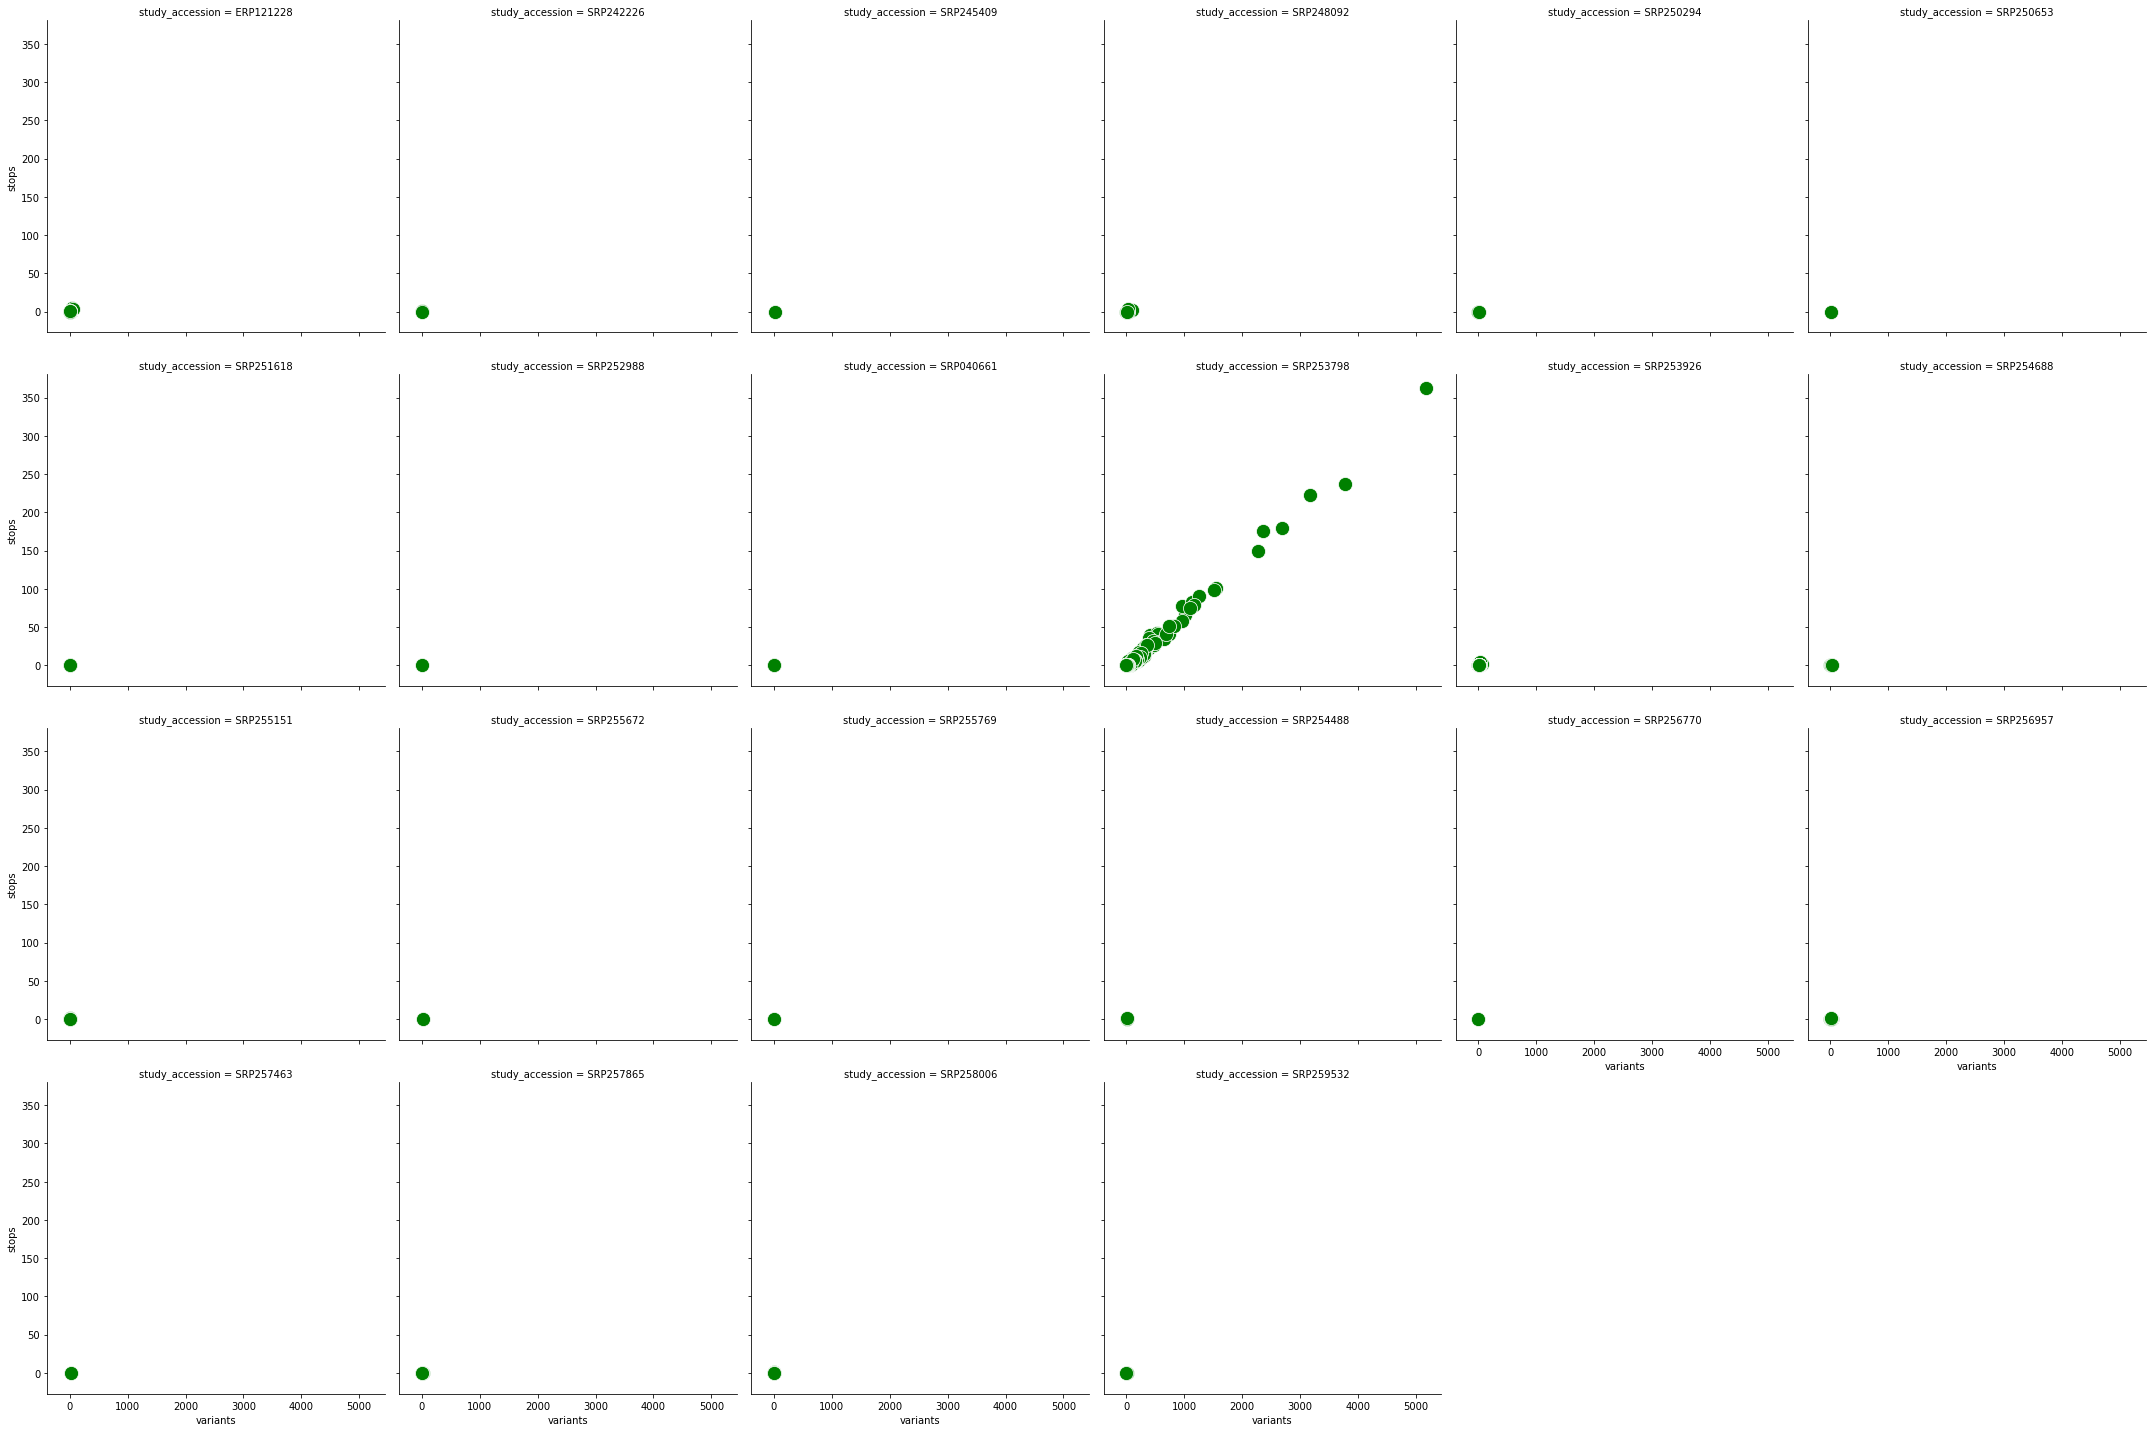

In [73]:
sns.relplot(x='variants',y='stops',data=var_vs_stops,col='study_accession',color='g',s=200,col_wrap=6,palette="Paired")

(0.9, 2000)

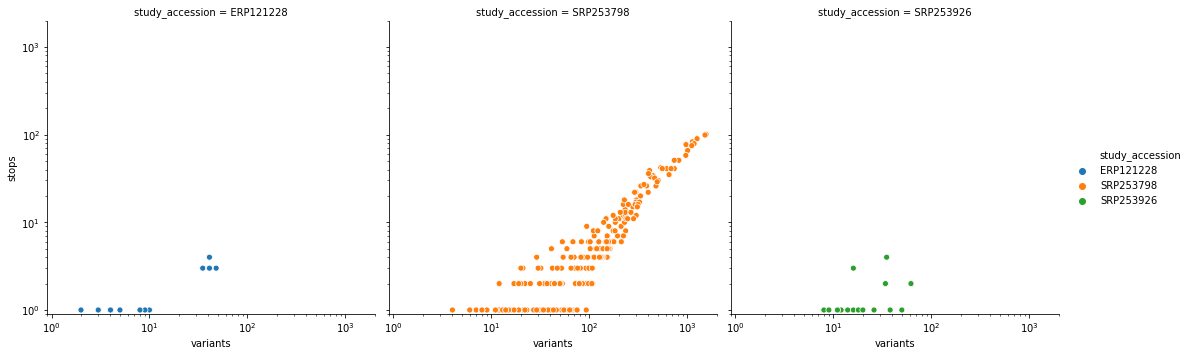

In [48]:
sns.relplot(x='variants',y='stops',data=c[c['study_accession'].isin(['SRP253798','ERP121228','SRP253926'])],hue='study_accession',col='study_accession')
plt.yscale('log')
plt.xscale('log')
plt.xlim(.9,2000)
plt.ylim(.9,2000)

In [76]:
var.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,study_accession,library_strategy,library_source,library_selection,type
0,ERR4082740,NC_045512,4540,C,T,2257.0,62,0.983871,0,"0,0,31,31",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,taC/taT,ERP121228,AMPLICON,VIRAL RNA,PCR,S
1,ERR4082740,NC_045512,13819,C,A,211.0,51,0.156863,0,"21,22,4,4",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Ctc/Atc,ERP121228,AMPLICON,VIRAL RNA,PCR,S
2,ERR4082742,NC_045512,241,C,T,2046.0,54,1.000000,0,"0,0,26,28",.,.,.,.,.,ERP121228,AMPLICON,VIRAL RNA,PCR,S
3,ERR4082742,NC_045512,2069,A,T,99.0,54,0.074074,0,"25,25,2,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Aca/Tca,ERP121228,AMPLICON,VIRAL RNA,PCR,S
4,ERR4082742,NC_045512,14408,C,T,2013.0,54,0.962963,0,"0,0,27,27",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,cCt/cTt,ERP121228,AMPLICON,VIRAL RNA,PCR,S


In [77]:
var['change'] = var['REF']+'->'+var['ALT']

In [79]:
var.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,IMPACT,FUNCLASS,EFFECT,GENE,CODON,study_accession,library_strategy,library_source,library_selection,type,change
0,ERR4082740,NC_045512,4540,C,T,2257.0,62,0.983871,0,"0,0,31,31",LOW,SILENT,SYNONYMOUS_CODING,orf1ab,taC/taT,ERP121228,AMPLICON,VIRAL RNA,PCR,S,C->T
1,ERR4082740,NC_045512,13819,C,A,211.0,51,0.156863,0,"21,22,4,4",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Ctc/Atc,ERP121228,AMPLICON,VIRAL RNA,PCR,S,C->A
2,ERR4082742,NC_045512,241,C,T,2046.0,54,1.000000,0,"0,0,26,28",.,.,.,.,.,ERP121228,AMPLICON,VIRAL RNA,PCR,S,C->T
3,ERR4082742,NC_045512,2069,A,T,99.0,54,0.074074,0,"25,25,2,2",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,Aca/Tca,ERP121228,AMPLICON,VIRAL RNA,PCR,S,A->T
4,ERR4082742,NC_045512,14408,C,T,2013.0,54,0.962963,0,"0,0,27,27",MODERATE,MISSENSE,NON_SYNONYMOUS_CODING,orf1ab,cCt/cTt,ERP121228,AMPLICON,VIRAL RNA,PCR,S,C->T


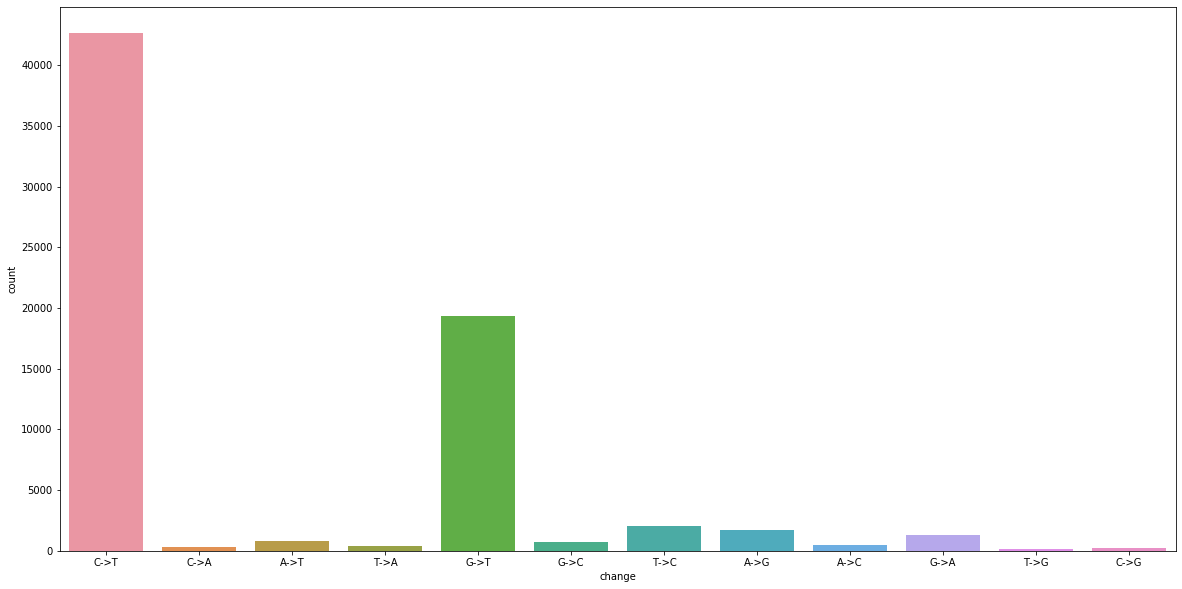

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(x='change',data=var)

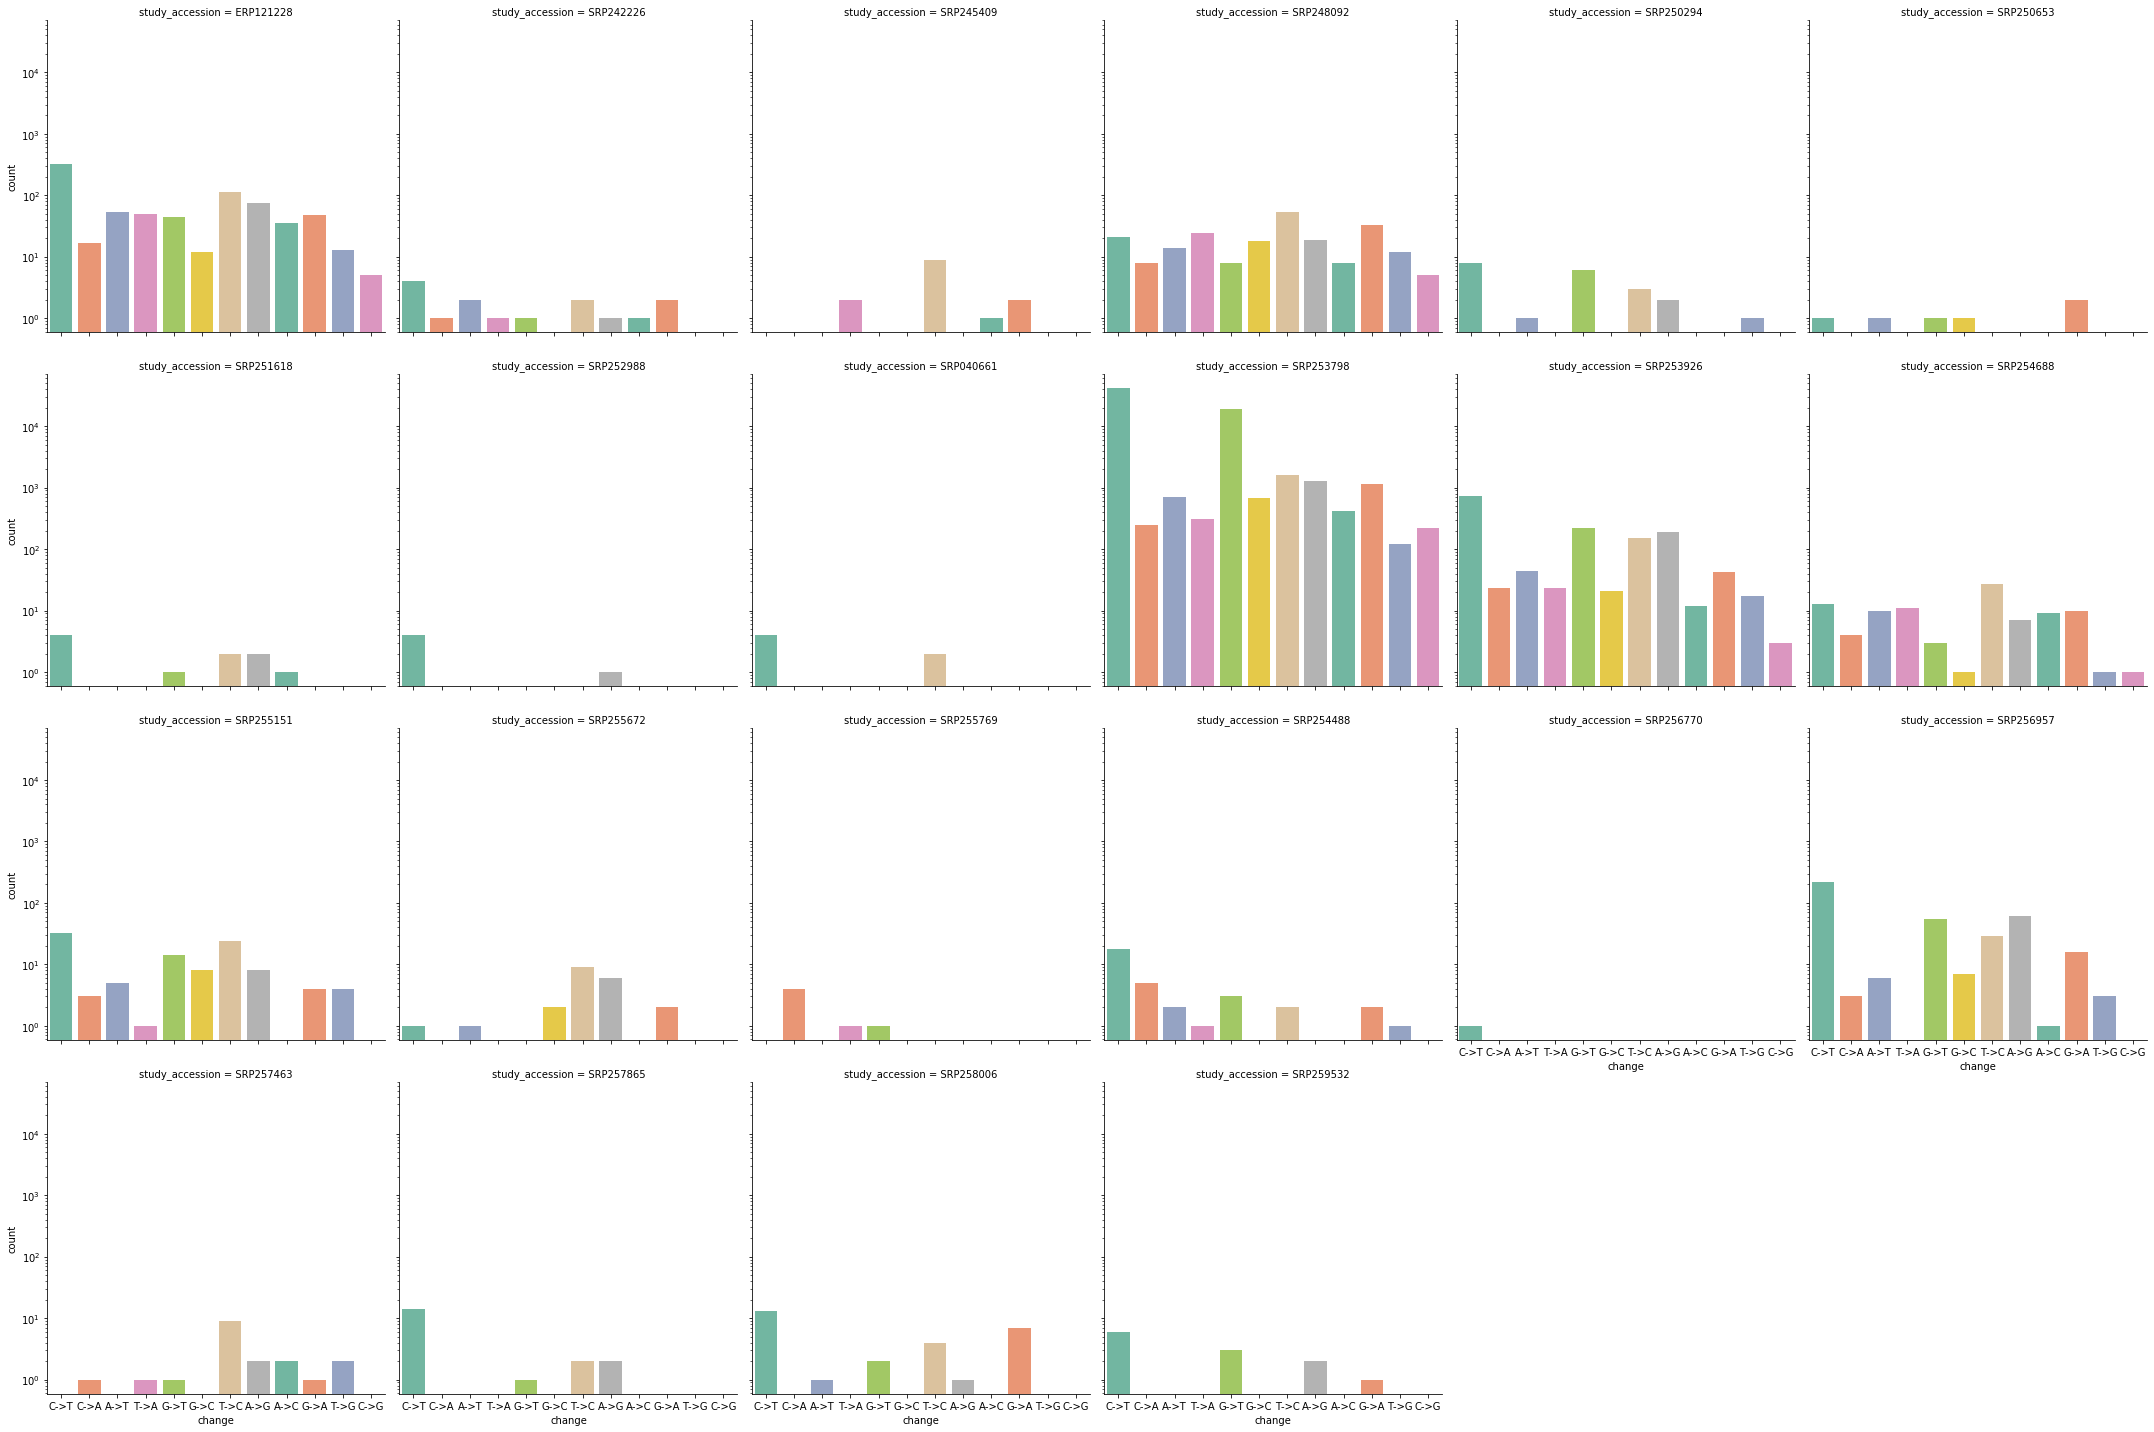

In [86]:
sns.catplot(x='change',col='study_accession',col_wrap=6,kind="count",data=var,palette="Set2")
plt.yscale('log')